# WIRELESS SENSOR NETWORK - DATA ANALYZER - STEP 2
#### Notebook not intended for final product

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import IPython.display
import glob
from datetime import datetime
from statistics import mean
from matplotlib.dates import DateFormatter

#NP = DF.to_numpy()
#DF = pd.DataFrame(NP)

In [2]:
# Set Working Directory
user      = 'adria'
subfolder = 'V 1.2.4 3 Node Test'
os.chdir('C:\\Users\\'+str(user)+'\\Desktop\\Repository\\WirelessSensorNetwork\\Data\\'
         + str(subfolder))
os.getcwd()

'C:\\Users\\adria\\Desktop\\Repository\\WirelessSensorNetwork\\Data\\V 1.2.4 3 Node Test'

In [3]:
#Retrieve All Data Files
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

filenames = []
for file in all_filenames:
    if file[0] == 'P':
        filenames.append(file)


#Create Comparison Frane
data = pd.read_csv(filenames[0])
df = pd.DataFrame(data.iloc[:,0])
df.columns =['DateTime']
df.head()

#Create Main Frame
counter = 0
for file in filenames:
    data = pd.read_csv(file)
    df = pd.concat([df, data.iloc[:,0:2]],axis=1)
column_count = len(df.columns)
node_count = int((column_count-1)/2)
df.head()

,DateTime,DateTime 001,Node 001,DateTime 002,Node 002,DateTime 003,Node 003
0,2020-03-04 00:00:00,2020-03-04 00:00:00,424.86,2020-03-04 00:00:00,415.17,2020-03-04 00:00:00,408.62
1,2020-03-04 00:00:30,2020-03-04 00:00:30,423.70,2020-03-04 00:00:30,417.60,2020-03-04 00:00:30,408.03
2,2020-03-04 00:01:00,2020-03-04 00:01:00,423.03,2020-03-04 00:01:00,414.97,2020-03-04 00:01:00,408.40
3,2020-03-04 00:01:30,2020-03-04 00:01:30,425.90,2020-03-04 00:01:30,413.50,2020-03-04 00:01:30,407.47
4,2020-03-04 00:02:00,2020-03-04 00:02:00,424.47,2020-03-04 00:02:00,413.43,2020-03-04 00:02:00,406.33


In [4]:
#Remove DateTime Columns
datetime_column = 1
for i in range(0, node_count):
    a = df.iloc[:,0] == df.iloc[:,datetime_column]
    if a.all() == True:
        print('Clear')
        df = df.drop(df.columns[datetime_column], axis = 1)
        datetime_column += 1
    else:
        print('Not Clear')
        datetime_column += 2

Clear
Clear
Clear


In [5]:
df.head()

,DateTime,Node 001,Node 002,Node 003
0,2020-03-04 00:00:00,424.86,415.17,408.62
1,2020-03-04 00:00:30,423.70,417.60,408.03
2,2020-03-04 00:01:00,423.03,414.97,408.40
3,2020-03-04 00:01:30,425.90,413.50,407.47
4,2020-03-04 00:02:00,424.47,413.43,406.33


In [6]:
df.tail()

,DateTime,Node 001,Node 002,Node 003
116,2020-03-04 00:58:00,413.07,407.17,405.70
117,2020-03-04 00:58:30,412.13,406.17,405.73
118,2020-03-04 00:59:00,413.80,406.97,408.83
119,2020-03-04 00:59:30,413.80,406.73,407.83
120,2020-03-04 01:00:00,414.00,408.00,408.00


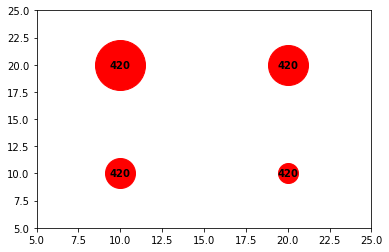

In [7]:
loc_node001 = [10, 20]
loc_node002 = [20, 20]
loc_node003 = [10, 10]
loc_node004 = [20, 10]
plt.plot(loc_node001[0], loc_node001[1], 'red', marker = 'o', alpha=1, markersize = 50)
plt.plot(loc_node002[0], loc_node002[1], 'red', marker = 'o', alpha=1, markersize = 40)
plt.plot(loc_node003[0], loc_node003[1], 'red', marker = 'o', alpha=1, markersize = 30)
plt.plot(loc_node004[0], loc_node004[1], 'red', marker = 'o', alpha=1, markersize = 20)
plt.text(10,10,'420', horizontalalignment='center', verticalalignment = 'center', color='black', fontweight = 'bold')
plt.text(10,20,'420', horizontalalignment='center', verticalalignment = 'center', color='black', fontweight = 'bold')
plt.text(20,10,'420', horizontalalignment='center', verticalalignment = 'center', color='black', fontweight = 'bold')
plt.text(20,20,'420', horizontalalignment='center', verticalalignment = 'center', color='black', fontweight = 'bold')

plt.xlim(5, 25)
plt.ylim(5, 25)
plt.show()